In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv("DataAvrgFinal2.csv")
data.head(10)

,City,State,Year,Zipcode_x,AvrgCommute,AvrgIncome,Zipcode_y,Avrg_HomeValue,MedianMonthly_HC,Zipcode,Number
0,Abilene,Texas,2013,2000,18.677578,31837.111507,1000,89700.0,740.0,1000,48
1,Abilene,Texas,2014,2000,19.269898,32825.921984,1000,103000.0,800.0,1000,48
2,Abilene,Texas,2015,2000,17.774664,34969.874497,1000,113400.0,805.0,1000,48
3,Abilene,Texas,2016,2000,21.091624,33090.747895,1000,107200.0,797.0,1000,48
4,Abilene,Texas,2017,2000,20.318681,37638.016147,1000,114900.0,784.0,1000,48
5,Akron,Ohio,2013,2000,26.596720,31964.392992,1000,78600.0,717.0,1000,39
6,Akron,Ohio,2014,2000,26.222661,31517.275773,1000,80300.0,730.0,1000,39
7,Akron,Ohio,2015,2000,27.322526,34961.820853,1000,80600.0,708.0,1000,39
8,Akron,Ohio,2016,2000,26.151451,34155.503968,1000,78000.0,725.0,1000,39
9,Akron,Ohio,2017,2000,25.868104,31342.588614,1000,81600.0,736.0,1000,39


In [75]:
data5cities=data.groupby(['City','State'], as_index=False).mean()
data5cities.head()
data5cities2=data5cities[data5cities['AvrgCommute']>=50]
list1=data5cities2['City'].unique()
list1

array(['Antioch', 'Dale City CDP', 'Lake Elsinore', 'New York',
       'Palmdale', 'Pittsburg', 'Poinciana CDP', 'Tracy', 'Waldorf CDP'],
      dtype=object)

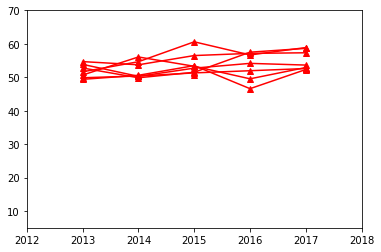

In [76]:
#list1=['New York', 'Tracy']

#test=pd.merge(data,data5cities2,on=['City','State'])
#test
for item in list1:
    test=data[data['City']==item]
    plt.plot(test['Year'], test['AvrgCommute'], marker="^", color="red", label=item)
plt.xlim(2012,2018,1)
plt.ylim(5,70,5)
plt.show()

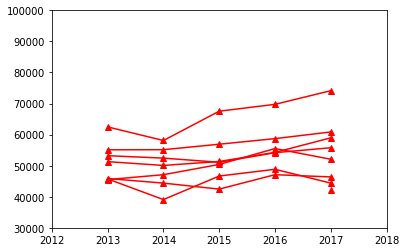

In [77]:
for item in list1:
    test=data[data['City']==item]
    plt.plot(test['Year'], test['AvrgIncome'], marker="^", color="red", label="l")
plt.xlim(2012,2018,1)
plt.ylim(30000,100000,10000)
plt.show()

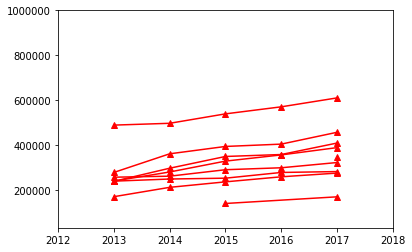

In [78]:
for item in list1:
    test=data[data['City']==item]
    plt.plot(test['Year'], test['Avrg_HomeValue'], marker="^", color="red", label="l")
plt.xlim(2012,2018,1)
plt.ylim(30000,1000000,50000)
plt.show()

In [81]:
import numpy as np
correlation=data[data['Year']==2017]
correlation=correlation.dropna()
#P = np.percentile(correlation['MedianMonthly_HC'], [5, 95])
#correlation = correlation[(correlation['MedianMonthly_HC'] > P[0]) & (correlation['MedianMonthly_HC'] < P[1])]
#P = np.percentile(correlation['AvrgCommute'], [5, 95])
#correlation = correlation[(correlation['AvrgCommute'] > P[0]) & (correlation['AvrgCommute'] < P[1])]
from scipy.stats import linregress
#numpy.corrcoef(correlation['AvrgCommute'], correlation['AvrgIncome'])[0, 1]
linregress(correlation['AvrgCommute'], correlation['MedianMonthly_HC'])
#correlation.corr()
#sum(pd.isnull(correlation['AvrgCommute']))

LinregressResult(slope=33.141173989127616, intercept=206.1339983619082, rvalue=0.5854967774001435, pvalue=2.0877880997149674e-57, stderr=1.8609650957471813)

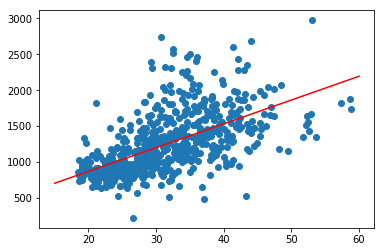

In [82]:
from sklearn.linear_model import LinearRegression
import matplotlib
matplotlib.use('qt5agg')

import matplotlib.pyplot as plt
import numpy as np

# Create random data
#randomNumberGenerator = np.random.RandomState(1000)
x = correlation['AvrgCommute']
y = correlation['MedianMonthly_HC']

# Create model
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(15, 60, 5)
yfit = model.predict(xfit[:, np.newaxis])

# plot
plt.scatter(x, y)
plt.plot(xfit, yfit,color='red');
plt.show()
#plt.scatter(data['AvrgCommute'], data['AvrgIncome'], marker="o", color="red", label="l")
#plt.xlim(2012,2018,1)
#plt.ylim(30000,1000000,50000)
#py.plot_mpl(fig, filename='linear-Fit-with-matplotlib')
#plt.show()

In [27]:
pearsonr_ci(correlation['AvrgCommute'], correlation['AvrgIncome'],alpha=0.05)

(0.36072200827805956,
 3.496119560664595e-20,
 0.2896307709276843,
 0.42785506190424605)